Linear RMSE: 5.001766890194189
Linear R² Score: 0.6588520195508119


C:\Users\arana\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Neural Net MSE: 14.479436874389648
Neural Net MAE: 2.445167303085327
Neural Net RMSE: 3.8051856732474487


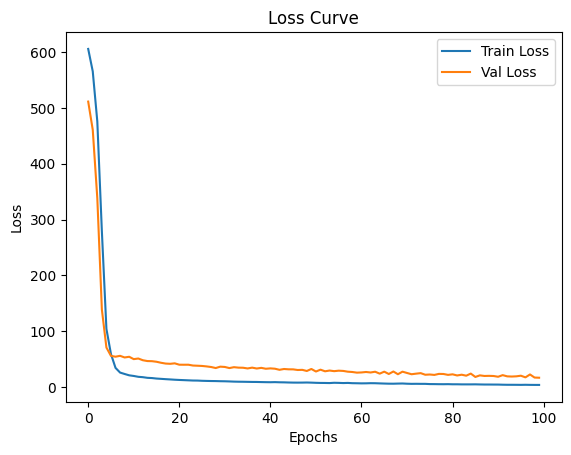

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('housingdata.csv')
data.fillna(data.mean(), inplace=True)

# Features & Target
X = data.drop("MEDV", axis=1)
y = data["MEDV"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Linear R² Score:", r2_score(y_test, y_pred_lr))

# Neural Network
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05, verbose=0)

# Evaluation
y_pred_nn = model.predict(X_test)
mse_nn, mae_nn = model.evaluate(X_test, y_test, verbose=0)
print("Neural Net MSE:", mse_nn)
print("Neural Net MAE:", mae_nn)
print("Neural Net RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_nn)))

# Plotting Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.xlabel("Epochs"); plt.ylabel("Loss"); plt.title("Loss Curve")
plt.show()
